In [12]:
import json
import pandas as pd

# Load WC 2022 Final data
with open('3869685.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.json_normalize(data, sep='_')

# Filter only shots
shots = df[df['type_name'] == 'Shot']
shots.head()


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,ball_recovery_offensive,shot_one_on_one,pass_outswinging,shot_aerial_won,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
191,545c2c84-018f-4570-a01c-753823feaeac,192,1,00:04:40.798,4,40,14,0.948190,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,4ad26294-8aaf-4d69-83dd-bbf9ef797b32,340,1,00:07:36.537,7,36,18,0.422018,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,6d498191-05f0-432c-8764-03aea4ef9fb8,602,1,00:16:15.886,16,15,27,0.872980,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,6d527ebc-a948-4cd8-ac82-daced35bb715,771,1,00:22:24.114,22,24,32,0.625635,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,f227a92e-d86c-4f3d-aa75-5ccb71adcae6,979,1,00:31:35.181,31,35,46,3.284765,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import numpy as np

shots['x'] = shots['location'].apply(lambda x: x[0])
shots['y'] = shots['location'].apply(lambda x: x[1])
shots['distance'] = np.sqrt((120 - shots['x'])**2 + (40 - shots['y'])**2)
shots['is_goal'] = shots['shot_outcome_name'].apply(lambda x: 1 if x == 'Goal' else 0)

# Predict xG using your trained model
shots['xG'] = model.predict_proba(shots[['distance']])[:, 1]

shots[['player_name', 'distance', 'is_goal', 'xG']]


C:\Users\Atharv Yadav\AppData\Local\Temp\ipykernel_13956\3397179169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['x'] = shots['location'].apply(lambda x: x[0])
C:\Users\Atharv Yadav\AppData\Local\Temp\ipykernel_13956\3397179169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['y'] = shots['location'].apply(lambda x: x[1])
C:\Users\Atharv Yadav\AppData\Local\Temp\ipykernel_13956\3397179169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,player_name,distance,is_goal,xG
191,Alexis Mac Allister,29.355749,0,0.002770
339,Rodrigo Javier De Paul,22.249719,0,0.018349
601,Ángel Fabián Di María Hernández,17.741759,0,0.058959
770,Lionel Andrés Messi Cuccittini,12.000000,1,0.226256
978,Alexis Mac Allister,30.540792,0,0.002017
1177,Ángel Fabián Di María Hernández,11.386395,1,0.256367
1915,Rodrigo Javier De Paul,20.740781,0,0.027257
2203,Julián Álvarez,17.839843,0,0.057516
2234,Lionel Andrés Messi Cuccittini,11.920151,0,0.230028
2516,Randal Kolo Muani,8.527602,0,0.426071


In [18]:
# Group shots by player
summary = shots.groupby('player_name').agg(
    Shots=('is_goal', 'count'),
    Goals_Scored=('is_goal', 'sum'),
    Total_xG=('xG', 'sum')
).reset_index()

# Calculate xG Difference
summary['xG_Difference'] = (summary['Goals_Scored'] - summary['Total_xG']).round(2)
summary['Total_xG'] = summary['Total_xG'].round(2)

# Sort by goals scored
summary = summary.sort_values(by='Goals_Scored', ascending=False)
summary


,player_name,Shots,Goals_Scored,Total_xG,xG_Difference
7,Kylian Mbappé Lottin,7,4,0.78,3.22
10,Lionel Andrés Messi Cuccittini,6,3,1.40,1.60
9,Leandro Daniel Paredes,1,1,0.23,0.77
4,Gonzalo Ariel Montiel,2,1,0.24,0.76
12,Randal Kolo Muani,3,1,0.73,0.27
11,Paulo Bruno Exequiel Dybala,1,1,0.23,0.77
15,Ángel Fabián Di María Hernández,2,1,0.32,0.68
0,Adrien Rabiot,1,0,0.09,-0.09
6,Kingsley Coman,1,0,0.23,-0.23
5,Julián Álvarez,1,0,0.06,-0.06


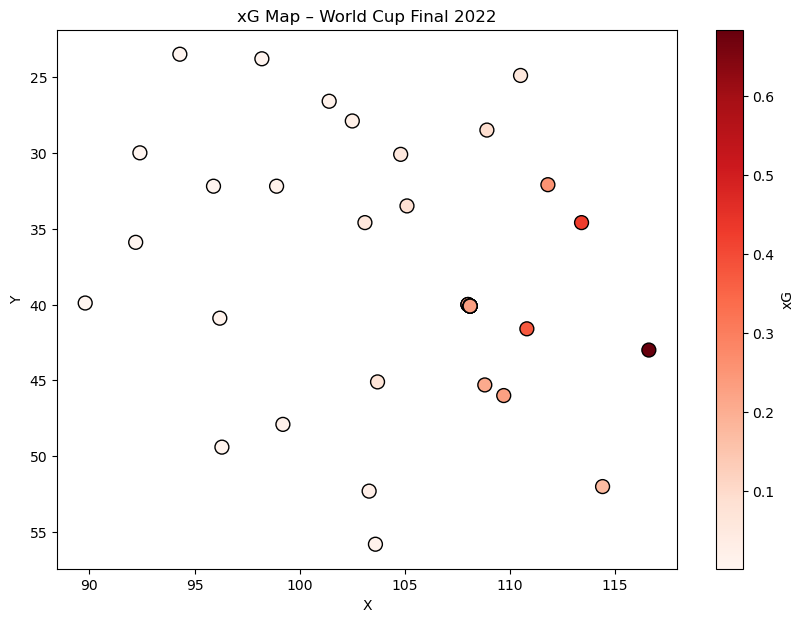

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(shots['x'], shots['y'], c=shots['xG'], cmap='Reds', s=100, edgecolor='black')
plt.colorbar(label="xG")
plt.title("xG Map – World Cup Final 2022")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.show()
